### DS 5110 Final Project - Initial Data Exploration
#### Tyler Entner (tje6gt)


#### Dataset Variable Descriptions:

| Variable Name      | Description |
| ----------- | ----------- |
|**external_author_id**|	An author account ID from Twitter|
|**author**	|The handle sending the tweet
|**content**	|The text of the tweet
|**region**|	A region classification, as determined by Social Studio
|**language**|	The language of the tweet
|**publish_date**|	The date and time the tweet was sent
|**harvested_date**|	The date and time the tweet was collected by Social Studio
|**following**|	The number of accounts the handle was following at the time of the tweet
|**followers**|	The number of followers the handle had at the time of the tweet
|**updates**|	The number of “update actions” on the account that authored the tweet, including tweets, retweets and likes
|**post_type**|	Indicates if the tweet was a retweet or a quote-tweet
|**account_type**|	Specific account theme, as coded by Linvill and Warren
|**retweet**|	A binary indicator of whether or not the tweet is a retweet
|**account_category**|	General account theme, as coded by Linvill and Warren
|**new_june_2018**|	A binary indicator of whether the handle was newly listed in June 2018
|**alt_external_id**|	Reconstruction of author account ID from Twitter, derived from article_url variable and the first list provided to Congress
|**tweet_id**|	Unique id assigned by twitter to each status update, derived from article_url
|**article_url**|	Link to original tweet. Now redirects to "Account Suspended" page
|**tco1_step1**|	First redirect for the first http(s)://t.co/ link in a tweet, if it exists
|**tco2_step1**|	First redirect for the second http(s)://t.co/ link in a tweet, if it exists
|**tco3_step1**|	First redirect for the third http(s)://t.co/ link in a tweet, if it exists

#### Data Ingestion

First, we'll load all of the datasets into dataframes. Each dataset will have the same schema, so we can load multiple datasets with one call.

In [1]:
# import context manager: SparkSession
from pyspark.sql import SparkSession

# import data types
from pyspark.sql.types import StructType, StructField, StringType, IntegerType

#Create session with custom app name, grab context
spark = SparkSession.builder \
        .master("local") \
        .appName("project_data_exploration") \
        .getOrCreate()

sc = spark.sparkContext

In [2]:
# Set data directory
data_directory = "data/"

# Define custom schema of csv files
schema = StructType([StructField('external_author_id', StringType(), True), 
                     StructField('author', StringType(), True),
                     StructField('content', StringType(), True),
                     StructField('region', StringType(), True),
                     StructField('language', StringType(), True),
                     StructField('publish_date', StringType(), True),
                     StructField('harvested_date', StringType(), True),
                     StructField('following', IntegerType(), True),
                     StructField('followers', IntegerType(), True),
                     StructField('updates', IntegerType(), True),
                     StructField('post_type', StringType(), True),
                     StructField('account_type', StringType(), True),
                     StructField('retweet', IntegerType(), True),
                     StructField('account_category', StringType(), True),
                     StructField('new_june_2018', IntegerType(), True),
                     StructField('alt_external_id', StringType(), True),
                     StructField('tweet_id', StringType(), True),
                     StructField('article_url', StringType(), True),
                     StructField('tco1_step1', StringType(), True),
                     StructField('tco2_step1', StringType(), True),
                     StructField('tco3_step1', StringType(), True)                    
                    ])

# Create df by loading in all csv files in data_directory with schema
df = spark.read.format("csv") \
    .option("header", "true") \
    .option("sep",",") \
    .schema(schema) \
    .load(data_directory)

In [19]:
# Filter for english content only
df_english = df.filter(df['language']=='English')
df.take(2) 

[Row(external_author_id='1647045721', author='CARRIETHORNTHON', content='New Study Reveals Liberals Have A Lower Average IQ Than Conservatives http://t.co/B82NFpFSf6 WE ON TWITTER KNEW THIS ALREADY.', region='United States', language='English', publish_date='6/1/2015 22:04', harvested_date='6/1/2015 22:04', following=80, followers=207, updates=1193, post_type='RETWEET', account_type='Right', retweet=1, account_category='RightTroll', new_june_2018=0, alt_external_id='1647045721', tweet_id='605495107186364419', article_url='http://twitter.com/CarrieThornthon/statuses/605495107186364419', tco1_step1='http://gopthedailydose.com/2015/06/01/new-study-reveals-liberals-have-a-lower-average-iq-than-conservatives/', tco2_step1=None, tco3_step1=None),
 Row(external_author_id='1647045721', author='CARRIETHORNTHON', content='Lindsey Graham has an entirely reasonable position on climate change, sometimes http://t.co/kZMZka7Ja7 http://t.co/55juNRjwAT', region='United States', language='English', publ

In [22]:
# Some information on the dataset:
print(df.count(), len(df.columns))
print(df_english.count(), len(df_english.columns))
df = df_english #replace df with english df

2946207 21
2096049 21


In [5]:
#Summary on numerical columns:
df.select('publish_date','following','followers', 'emoji').summary().show()

+-------+--------------------+-----------------+------------------+
|summary|        publish_date|        following|         followers|
+-------+--------------------+-----------------+------------------+
|  count|             2946024|          2914257|           2938143|
|   mean|             10.0875|3450.095834375623| 7015.175690904085|
| stddev|   11.46939249854648|5586.766929936087|14542.156191001564|
|    min|    Защитив свое ...|               -1|                -1|
|    25%|                 0.0|              333|               322|
|    50%|                 5.0|             1512|              1274|
|    75%|                18.0|             4761|             10656|
|    max|…"" https://t.co/...|            76210|            251276|
+-------+--------------------+-----------------+------------------+



In [21]:
# Unique counts of categorical columns:
from pyspark.sql.functions import desc
df.groupBy("region").count().sort(desc('count')).show()

+--------------------+-------+
|              region|  count|
+--------------------+-------+
|       United States|1825534|
|             Unknown| 239274|
|      United Kingdom|  16582|
|          Azerbaijan|   6847|
|             Germany|   1277|
|  Russian Federation|   1133|
|                null|   1132|
|               Italy|   1110|
|              Canada|    598|
|         Afghanistan|    455|
|             Belarus|    444|
|                Iraq|    423|
|              Israel|    402|
|United Arab Emirates|    362|
|             Ukraine|    145|
|               Spain|     69|
|              France|     67|
|               Egypt|     59|
|              Sweden|     41|
|              Mexico|     41|
|Iran, Islamic Rep...|     20|
|              Greece|     12|
|             Finland|      8|
|            Malaysia|      4|
|              Latvia|      3|
|      Czech Republic|      2|
|              Serbia|      2|
|             Denmark|      1|
|           Hong Kong|      1|
|       

In [56]:
df.groupBy("post_type").count().sort(desc('count')).show()

+-----------+-------+
|  post_type|  count|
+-----------+-------+
|       null|1258752|
|    RETWEET| 801766|
|QUOTE_TWEET|  35531|
+-----------+-------+



In [33]:
df.groupBy("account_category").count().sort(desc('count')).show()

+----------------+------+
|account_category| count|
+----------------+------+
|      RightTroll|695149|
|        NewsFeed|596203|
|       LeftTroll|414097|
|    HashtagGamer|234094|
|      Commercial|112385|
|      NonEnglish| 26237|
|      Fearmonger| 10983|
|         Unknown|  6901|
+----------------+------+



#### Data Cleaning
Now that the data has been ingested into a single dataframe, we can begin to examine a couple fields and determine if any cleaning needs to be done. 

Ideas:
- Extract URL to seperate column, replace with <url>
- Replace emojis with <emoji>, count number into seperate column
- Take publish date and extract hour, day, month, year
- Columns for length of content in words, characters

In [34]:
#%pip install emoji

In [113]:
# Create features
import emoji
import re
import datetime
from pyspark.sql.functions import col
from pyspark.sql import functions as F
from pyspark.mllib.stat import Statistics

#df.withColumn('emoji_count', emoji.emoji_count(df.select('content'))).show()

def count_emoji(string):
    '''
    Count number of emojis within a string
    '''
    if string:
        return emoji.emoji_count(string)
    else:
        return 0
count_emoji_udf = F.udf(lambda x: count_emoji(x), IntegerType())

def extract_emoji(string):
    '''
    Extract emojis by converting them to text
    '''
    if string:
        return emoji.demojize(emoji.distinct_emoji_lis(string))
    else:
        return 'None'
extract_emoji_udf = F.udf(lambda x: extract_emoji(x), StringType())

def extract_urls(string):
    '''
    Extract all urls in string
    '''
    if string:
        urls = re.findall('(?:(?:https?|ftp):\\/\\/)?[\\w/\\-?=%.]+\\.[\\w/\\-&?=%.]+', string)
        return urls
    else:
        return 'None'
extract_urls_udf = F.udf(lambda x: extract_urls(x), StringType())

def url_count(string):
    '''
    Count all urls in string
    '''
    if string:
        return(len(extract_urls(string)))
    else:
        return 0
url_count_udf = F.udf(lambda x: url_count(x), IntegerType())

def extract_url_parts(string):
    '''
    Return url in parts (https://stackoverflow.com/questions/27745/getting-parts-of-a-url-regex)
    '''
    if string:
        return re.findall('^((http[s]?|ftp):\/)?\/?([^:\/\s]+)((\/\w+)*\/)([\w\-\.]+[^#?\s]+)(.*)?(#[\w\-]+)?$', string)
    else:
        return 'None'

def extract_urls_redirect_base(string_1, string_2, string_3):
    '''
    Call extract_url_parts and create a list of hosts from twitters redirect columns
    '''
    host_list = ['', '', '']
    if string_3:
        url_parts = extract_url_parts(string_3)
        host_list[2] = url_parts[0][2]
    if string_2:
        url_parts = extract_url_parts(string_2)
        host_list[1] = url_parts[0][2]
    if string_1:
        url_parts = extract_url_parts(string_1)
        host_list[0] = url_parts[0][2]
    else:
        return 'None'
    return host_list
extract_urls_redirect_base_udf = F.udf(lambda x,y,z: extract_urls_redirect_base(x,y,z), StringType())

def word_count(string):
    '''
    Count number of words in string (slightly error prone b/c split on spaces)
    '''
    if string:
        return len(string.split(' '))
    else:
        return 0
word_count_udf = F.udf(lambda x: word_count(x), IntegerType())

def character_count(string):
    '''
    Count number of characters in the tweet
    '''
    if string:
        return len(string)
    else: 
        return 0
character_count_udf = F.udf(lambda x: character_count(x), IntegerType())

def extract_date_info(string, info_type):
    '''
    IN WORK
    Extract date info
    '''
    date = datetime.datetime.strptime(string, '%m/%d/%Y %H:%M')
    
    if info_type == 'minute':
        info = date.minute
    elif info_type == 'hour':
        info = date.hour
    elif info_type == 'day':
        info = date.day
    elif info_type == 'month':
        info = date.month
    elif info_type == 'year':
        info = date.year    
    return info
extract_date_info_udf = F.udf(lambda x,y: extract_date_info(x,y), IntegerType())

In [114]:
# Create dataframe witih all columns from feature extraction
df = df.withColumn('emoji_count', count_emoji_udf(col('content'))) \
           .withColumn('emoji_text', extract_emoji_udf(col('content'))) \
           .withColumn('word_count', word_count_udf(col('content'))) \
           .withColumn('char_count', character_count_udf(col('content'))) \
           .withColumn('urls', extract_urls_udf(col('content'))) \
           .withColumn('url_count', url_count_udf(col('content'))) \
           .withColumn('url_hosts', extract_urls_redirect_base_udf(col('tco1_step1'), col('tco2_step1'), col('tco3_step1'))) 
        #   .withColumn('hour', extract_date_info_udf(col('publish_date'), 'hour')) \
         #  .withColumn('day', extract_date_info_udf(col('publish_date'), 'day')) \
          # .withColumn('month', extract_date_info_udf(col('publish_date'), 'month')) \
           #.withColumn('year', extract_date_info_udf(col('publish_date'), 'year')) 


df.take(2)

[Row(external_author_id='1647045721', author='CARRIETHORNTHON', content='New Study Reveals Liberals Have A Lower Average IQ Than Conservatives http://t.co/B82NFpFSf6 WE ON TWITTER KNEW THIS ALREADY.', region='United States', language='English', publish_date='6/1/2015 22:04', harvested_date='6/1/2015 22:04', following=80, followers=207, updates=1193, post_type='RETWEET', account_type='Right', retweet=1, account_category='RightTroll', new_june_2018=0, alt_external_id='1647045721', tweet_id='605495107186364419', article_url='http://twitter.com/CarrieThornthon/statuses/605495107186364419', tco1_step1='http://gopthedailydose.com/2015/06/01/new-study-reveals-liberals-have-a-lower-average-iq-than-conservatives/', tco2_step1=None, tco3_step1=None, emoji_count=0, emoji_text='', word_count=18, char_count=125, urls='[http://t.co/B82NFpFSf6]', url_count=1, url_hosts='[gopthedailydose.com, , ]'),
 Row(external_author_id='1647045721', author='CARRIETHORNTHON', content='Lindsey Graham has an entirely

In [115]:
df.select('publish_date','following','followers', 'emoji_count','word_count', 'char_count', 'url_count').summary().show()

+-------+--------------+-----------------+------------------+------------------+------------------+------------------+
|summary|  publish_date|        following|         followers|        word_count|        char_count|         url_count|
+-------+--------------+-----------------+------------------+------------------+------------------+------------------+
|  count|       2096049|          2096049|           2096049|           2096049|           2096049|           2096049|
|   mean|          null|4241.562128557109| 7146.343682328037|13.181881721276554| 99.08216840350583|0.9484396595690272|
| stddev|          null| 6231.62797308032|11624.817215193514| 5.479144213764923|35.353085319885935|0.8072481291750243|
|    min|1/1/2013 16:16|                0|                 0|                 0|                 0|                 0|
|    25%|          null|              606|               636|                10|                72|                 0|
|    50%|          null|             2035|      

#### Data Visualization

Create some sample graphics that detail features within the dataset

Ideas:
- Tokenize and create a word cloud visualization of content

In [117]:
import matplotlib.pyplot as plt

In [ ]:
# Visualize Follwers per account per post
bins, counts = df.select('followers').rdd.flatMap(lambda x: x).histogram([0,10, 100, 1000, 10000, 1000000, 10000000])
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1)
ax.hist(bins[:-1], bins=bins, weights=counts)
ax.set_xscale('log')
plt.xlabel('Number of Followers')
plt.ylabel('Count')
plt.title('Histogram of Followers per Account (log scale)')
plt.show()

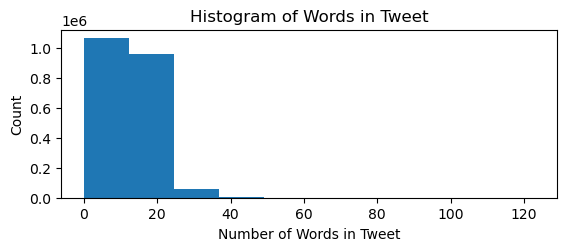

In [124]:
# Visualize Word Count
bins, counts = df.select('word_count').rdd.flatMap(lambda x:x).histogram(10)
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1)
ax.hist(bins[:-1], bins=bins, weights=counts)
plt.xlabel('Number of Words in Tweet')
plt.ylabel('Count')
plt.title('Histogram of Words in Tweet')
plt.show()

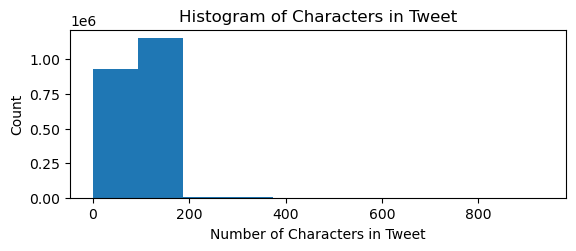

In [125]:
# Visualize Character Count
bins, counts = df.select('char_count').rdd.flatMap(lambda x:x).histogram(10)
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1)
ax.hist(bins[:-1], bins=bins, weights=counts)
plt.xlabel('Number of Characters in Tweet')
plt.ylabel('Count')
plt.title('Histogram of Characters in Tweet')
plt.show()

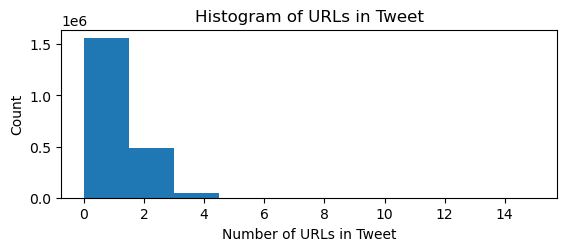

In [127]:
# Visualize Number of URLs
bins, counts = df.select('url_count').rdd.flatMap(lambda x:x).histogram(10)
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1)
ax.hist(bins[:-1], bins=bins, weights=counts)
plt.xlabel('Number of URLs in Tweet')
plt.ylabel('Count')
plt.title('Histogram of URLs in Tweet')
plt.show()

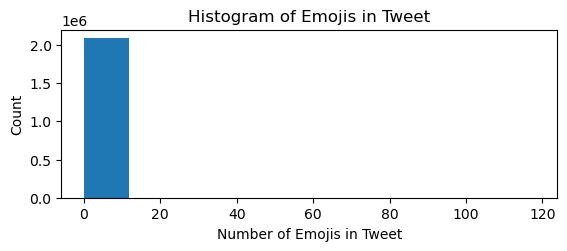

In [128]:
# Visualize Number of Emojis
bins, counts = df.select('emoji_count').rdd.flatMap(lambda x:x).histogram(10)
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1)
ax.hist(bins[:-1], bins=bins, weights=counts)
plt.xlabel('Number of Emojis in Tweet')
plt.ylabel('Count')
plt.title('Histogram of Emojis in Tweet')
plt.show()